In [2]:
import os

from thop.vision.basic_hooks import count_adap_avgpool

# 假设有两个文件路径
file1_path = '/home/disk3/jsa/projects/TLD_backend/src/main/algorithm/main/main.py'
file2_path = '/home/disk3/jsa/projects/TLD_backend/src/main/java/org/zjuvipa/util/PythonCallerUtil.java'
file3_path = '/home/disk3/jsa/projects/TLD_backend/src/main/java/org/zjuvipa/DemoApplication.java'
# 计算相对路径
relative_path = os.path.relpath(file1_path, os.path.dirname(file3_path))

print("Relative path from file2 to file1:", relative_path)

Relative path from file2 to file1: ../../../algorithm/main/main.py


In [5]:
%matplotlib inline
import cv2
import img_processing as ip
import matplotlib.pyplot as plt
image_path=r"D:\PycharmProjects\TLD\src\main\algorithm\test\case1\3-DK324+390-535GD P_1.JPG"
image=cv2.imread(image_path)
original_line = ip.horizon_line(image[:, 63:64])
if original_line:
    original_line = original_line.pop() + 1
else:
    raise ValueError("No horizontal line found in the specified range.")
print(original_line)
vertical_position = image[original_line:, 48:54]
# plt.figure(figsize=(10, 10))
# plt.imshow(image[20:30,20:30],cmap='gray')
# plt.show()

TypeError: 'NoneType' object is not subscriptable

# 解决读取图片首数值和尾数值的问题

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import img_processing as ip

img_path = r"D:\PycharmProjects\TLD\src\main\algorithm\test\problem1\6-DK627+515-647YY P_1.jpg"
# img_path = r"C:\Users\DELL\Desktop\TEST\example4\1-D2K999+150-D2K999+350-ZQ-12 P_1.JPG"
# img_path =r"C:\Users\DELL\Desktop\tunnel_data\731\1-D1K67+275-505GD\8-D1K67+275-505GD P_1.JPG"
image = cv.imread(img_path, cv.IMREAD_COLOR)  # 读取图像 三通道彩色图
#更改 image的显示范围 调节List，将得到的List添加到下方的regions中
plt.imshow(image[16:30, 130:196])
plt.axis('off')
plt.show()
regions = [
    (8, 20, 62, 112),
    (8, 20, 121, 176),
    (10, 26, 130, 196),
    (14, 29, 62, 117),
    (16, 30, 130, 196)
]
rheadnum = None
for (y1, y2, x1, x2) in regions:
    try:
        head_number = image[y1:y2, x1:x2]
        rheadnum = ip.split_num(head_number)
        if (x1, x2) in [(121, 176), (130, 196)]:
            rheadnum -= 1
        break
    except ValueError:
        continue

if rheadnum is None:
    raise ValueError("No valid head number found.")

print(rheadnum)

# 图片尾数值的读取

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import img_processing as ip

# img_path = r"D:\PycharmProjects\TLD\src\main\algorithm\test\problem1\3-DK623+440-360 GD P_1.jpg"
img_path = r"D:\PycharmProjects\TLD\src\main\algorithm\test\problem1\6-DK627+515-647YY P_1.jpg"
# img_path = r"C:\Users\DELL\Desktop\TEST\example4\1-D2K999+150-D2K999+350-ZQ-12 P_1.JPG"
# img_path =r"C:\Users\DELL\Desktop\tunnel_data\731\1-D1K67+275-505GD\8-D1K67+275-505GD P_1.JPG"
image = cv.imread(img_path, cv.IMREAD_COLOR)  # 读取图像 三通道彩色图
plt.imshow(image[14:29, -145:-70])
plt.axis('off')
plt.show()
regions = [
    (8, 20, -191, -92),
    (8, 20, -140, -92),
    (10, 25, -132, -85),
    (14, 29, -145, -70)
]
rtailnum = None
for (y1, y2, x1, x2) in regions:
    try:
        tail_number = image[y1:y2, x1:x2]
        rtailnum = ip.split_num(tail_number)
        rtailnum = ip.tailnum_revise(rtailnum)
        break
    except ValueError:
        continue

if rtailnum is None:
    raise ValueError("No valid tail number found.")

print(rtailnum)

# 检查 Get wrong Vertical Resolution.问题

In [43]:
import number_processing
def get_tailnum(img):
    """
    定义split_num函数，用于分割数字并保存
    返回数字
    """
    # 将彩色图像转化为灰度图像
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # 二值化处理，你可以根据需要调整阈值
    _, thresh = cv.threshold(img_gray, 128, 255, cv.THRESH_BINARY_INV)
    # 查找轮廓
    contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    print(contours)
    print(len(contours))
    # 对轮廓进行排序，以便从左到右处理数字（可选）
    contours = sorted(contours, key=lambda x: cv.boundingRect(x)[0])
    contours = sorted(contours, key=lambda x: cv.boundingRect(x)[1])

    # 用于存储识别出的数字字符串
    recognized_digits = []

    # 遍历每个轮廓，并保存每个数字的图片
    for i, contour in enumerate(contours):
        x, y, w, h = cv.boundingRect(contour)
        digit = thresh[y:y + h, x:x + w]
        # print(f"第{i+1}个数字的尺寸：{digit.shape[0]}")
        if digit.shape[0] < 5:  # 小数点的轮廓太小，跳过
            continue
        num_index = number_processing.num_list.index(digit.tolist())
        if num_index // 10 == 1:
            num_index = num_index % 10
        recognized_digits.append(str(num_index))
    length = len(recognized_digits)
    print("length",length)
    print("recognized_digits:", recognized_digits)
    # tail_num_list = recognized_digits[::(length // 3)]
    # tail_num_list=recognized_digits[(length // 3)-1:(length // 3)+1]+[recognized_digits[-1]]
    tail_num_list=recognized_digits[-3:]
    print("tail_num_list",tail_num_list)
    tail_num = int("".join(tail_num_list))
    tail_num = tail_num / 100
    return tail_num


original_line 66
(array([[[ 31, 459]],

       [[ 34, 459]]], dtype=int32), array([[[ 10, 453]],

       [[ 10, 454]],

       [[ 11, 454]],

       [[ 11, 453]]], dtype=int32), array([[[ 25, 443]],

       [[ 23, 445]],

       [[ 23, 452]],

       [[ 25, 454]],

       [[ 27, 454]],

       [[ 29, 452]],

       [[ 29, 445]],

       [[ 27, 443]]], dtype=int32), array([[[ 16, 443]],

       [[ 14, 445]],

       [[ 14, 452]],

       [[ 16, 454]],

       [[ 18, 454]],

       [[ 20, 452]],

       [[ 20, 445]],

       [[ 18, 443]]], dtype=int32), array([[[  4, 443]],

       [[  3, 444]],

       [[  2, 444]],

       [[  3, 444]],

       [[  4, 445]],

       [[  4, 454]],

       [[  5, 454]],

       [[  5, 443]]], dtype=int32), array([[[ 31, 344]],

       [[ 34, 344]]], dtype=int32), array([[[ 10, 338]],

       [[ 10, 339]],

       [[ 11, 339]],

       [[ 11, 338]]], dtype=int32), array([[[ 23, 328]],

       [[ 23, 333]],

       [[ 24, 333]],

       [[ 25, 332]],

    

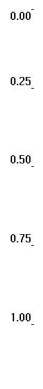

1.0


In [45]:
import matplotlib.pyplot as plt
import cv2 as cv
import img_processing as ip

img_path = r"D:\PycharmProjects\paper_accomplish\TLD\src\main\algorithm\test\add_test\8-DK326+135-237 YY P_12.JPG"
# img_path = r"D:\PycharmProjects\paper_accomplish\TLD\src\main\algorithm\test\case1\3-DK324+390-535GD P_1.JPG"
# img_path =r"C:\Users\DELL\Desktop\tunnel_data\731\1-D1K67+275-505GD\8-D1K67+275-505GD P_1.JPG"
image = cv.imread(img_path, cv.IMREAD_COLOR)  # 读取图像 三通道彩色图
num_position = image[66:, 13:48]
original_line = ip.horizon_line(image[:, 63:64])
if original_line:
    original_line = original_line.pop() + 1
else:
    raise ValueError("No horizontal line found in the specified range.")
print("original_line",original_line)
depth = get_tailnum(num_position)
plt.imshow(num_position)
plt.axis('off')
plt.show()
print(depth)

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import img_processing as ip
vertical_position = image[original_line:, 48:54]  # (水平，垂直)
black_lines = ip.find_black_horizontal_lines(vertical_position)
vertical_resolution = ip.compute_vertical_resolution(depth, black_lines)
if vertical_resolution==0:
    raise ValueError("Get wrong Vertical Resolution.")
vertical_resolution = vertical_resolution